# Polynomial Regression — Theory, Intuition, Degree Selection, and Overfitting

---

## 1. Why Linear Regression Fails on Non-Linear Data

Till now, we assumed that the relationship between input and output is linear.

That assumption means:

$$
y = \beta_0 + \beta_1 x
$$

This works **only if the true relationship is a straight line**.

---

### Problem Statement

Suppose the true data-generating process is:

$$
y = 2.8x^2 + 0.8x + 2 + \text{noise}
$$

This is **clearly non-linear**.

If we apply simple linear regression here, the model will try to fit a **straight line** on a **curved pattern**, which is mathematically incorrect.

---

## 2. Visual Failure of Linear Regression

When linear regression is applied to non-linear data:

- Predictions are systematically wrong
- Error remains high
- Line cannot bend to match curvature

Reason:
$$
\text{A linear model cannot represent } x^2 \text{ behavior}
$$

---

## 3. Core Idea of Polynomial Regression

Polynomial regression **does NOT change the algorithm**.

It changes only the **features**.

We convert input features into **polynomial features**, then apply **linear regression**.

---

## 4. Polynomial Regression Equation

For degree-2 polynomial regression:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

For degree-3:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3
$$

General form:

$$
y = \beta_0 + \sum_{k=1}^{d} \beta_k x^k
$$

---

## 5. Important Clarification (Very Important)

Polynomial regression is **still linear regression**, because:

- Model is linear in **parameters**
- Non-linearity exists only in **features**

Example:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

This is linear in:
$$
\beta_0,\ \beta_1,\ \beta_2
$$

---

## 6. Feature Transformation Concept

Original input:

$$
X = [x]
$$

Polynomial transformation (degree = 2):

$$
X' = [1,\ x,\ x^2]
$$

Polynomial transformation (degree = 3):

$$
X' = [1,\ x,\ x^2,\ x^3]
$$

---

## 7. Why Target Variable Is NOT Transformed

We apply polynomial transformation **only on inputs**, not outputs.

Correct:
$$
x \rightarrow [x,\ x^2,\ x^3]
$$

Wrong:
$$
y \rightarrow y^2
$$

Because regression minimizes error on original target scale.

---

## 8. Fitting Polynomial Regression

After transformation, we apply standard linear regression:

$$
\hat{y} = X'\beta
$$

Cost function remains same:

$$
J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

## 9. Effect of Polynomial Degree

### Degree = 1
$$
\text{Underfitting}
$$

Model too simple → cannot capture curvature.

---

### Degree = 2
$$
\text{Good fit (if true relation is quadratic)}
$$

Captures curvature properly.

---

### Degree = 3 or 4
$$
\text{May still work, but risk increases}
$$

---

### Degree Very Large (e.g., 15, 30, 300)

$$
\textbf{Overfitting}
$$

Model memorizes training data noise.

---

## 10. Underfitting vs Overfitting

### Underfitting
- Degree too low
- Misses important patterns
- High bias

---

### Overfitting
- Degree too high
- Fits noise
- Poor test performance
- High variance

---

## 11. Overfitting Visualization Logic

Training data (blue points):
- Model fits extremely well

Test data (green points):
- Predictions become unstable

Reason:
$$
\text{Model learns noise, not true pattern}
$$

---

## 12. Why Higher Degree Causes Overfitting

Number of features grows rapidly.

For one input feature:

$$
\text{Degree } d \Rightarrow d \text{ features}
$$

For two input features:

$$
\text{Degree } 2 \Rightarrow 6 \text{ features}
$$

---

## 13. Polynomial Regression with Multiple Inputs

Let inputs be:

$$
x_1,\ x_2
$$

Degree-2 polynomial features:

$$
[1,\ x_1,\ x_2,\ x_1^2,\ x_2^2,\ x_1x_2]
$$

Model becomes:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2
+ \beta_3x_1^2 + \beta_4x_2^2 + \beta_5x_1x_2
$$

---

## 14. Degree Definition in Multivariate Case

Polynomial degree is:

$$
\text{Maximum sum of powers in any term}
$$

Example:

$$
x_1^2 x_2 \Rightarrow \text{degree } 3
$$

---

## 15. Why Degree Does NOT Increase Arbitrarily

Higher degree means:
- More parameters
- More variance
- Higher chance of overfitting

Hence:

$$
\text{Higher degree} \neq \text{better model}
$$

---

## 16. Choosing the Right Degree

Correct degree depends on:
- Data complexity
- Noise level
- Number of samples

---

### Practical Techniques

1. Train–test error comparison
2. Cross-validation
3. Validation curves
4. Bias-variance analysis

---

## 17. Key Insight from the Lecture

For the shown dataset:

$$
\textbf{Optimal degree} = 2
$$

Because:
- Data generated using quadratic equation
- Degree-2 captures true structure
- Higher degrees only add noise fitting

---

## 18. Final Understanding

- Polynomial regression solves **non-linear relationships**
- It is linear regression on **expanded features**
- Degree selection is critical
- Too low → underfitting
- Too high → overfitting

---

## 19. What You Must Practice

1. Try different degrees
2. Observe training vs test error
3. Visualize curves
4. Understand bias–variance tradeoff

---

## 20. Closing Note

Polynomial regression is powerful,
but **dangerous if misused**.

Always remember:

$$
\text{Simple model that generalizes > complex model that memorizes}
$$

---


In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
X = 6 * np.random.rand(200, 1) - 3
y = 0.9 * X**2 + 1.2 * X + 3 + np.random.randn(200, 1)

# y = 0.9x^2 + 1.2x + 3

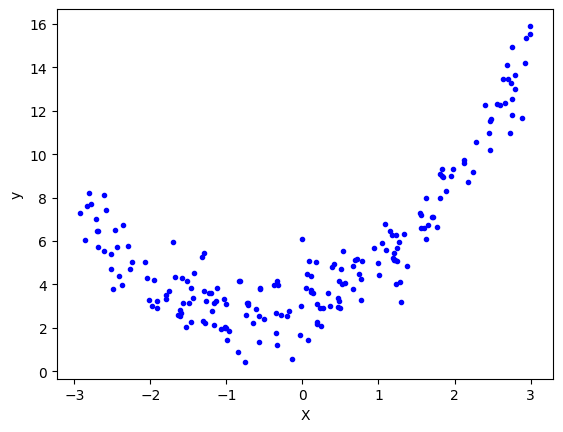

In [26]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.25853828952810654

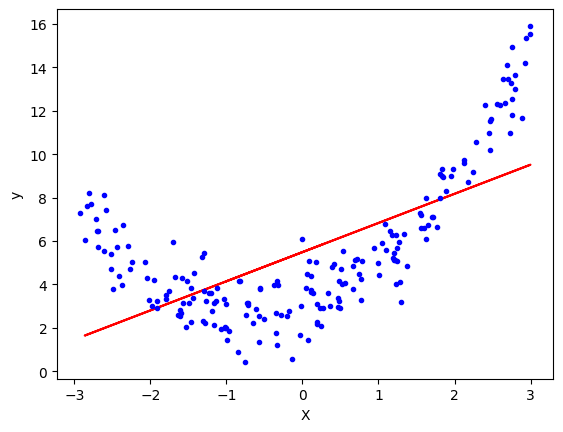

In [29]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [30]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0])

[-1.00257616]
[ 1.         -1.00257616  1.00515896]


In [31]:
# include_bias parameter
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8193157548307202

In [33]:
print(lr.coef_)
print(lr.intercept_)

[[0.         1.14460084 0.93174954]]
[2.90136748]


In [34]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

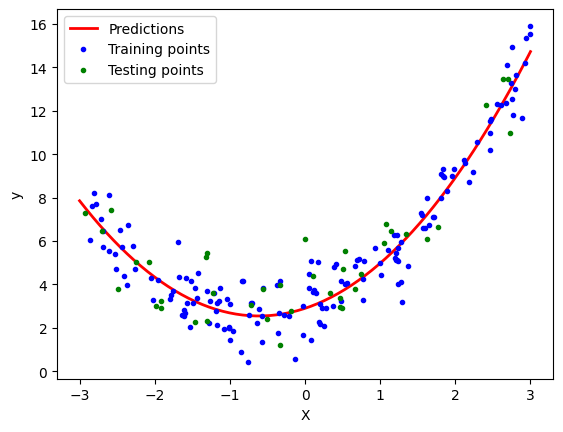

In [35]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [36]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

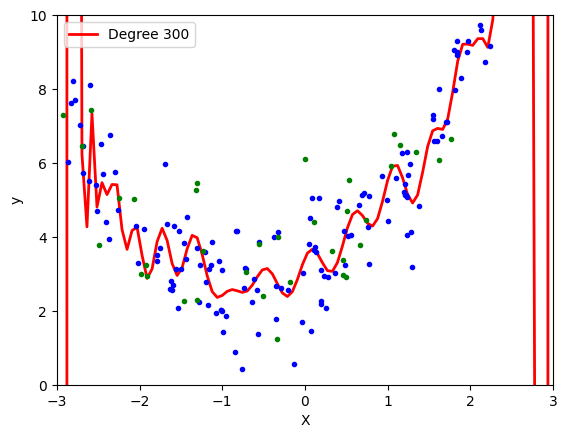

In [37]:
polynomial_regression(300)

In [38]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



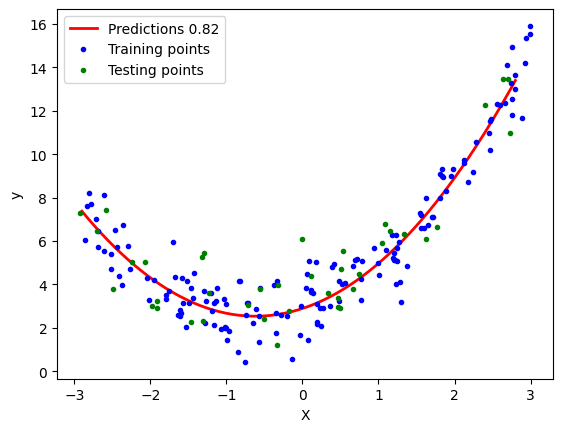

In [39]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [40]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.3*x + 0.3*y + 0.1*x*y + 3 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()


In [41]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [42]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [43]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [44]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [45]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,30])))

fig.show()